In [1]:
#representing in a list
csv= [['A1','B1','C1'],['A2','B2','C2']]
print(csv[0][1])
csv= [{'name':'A1','class': '4'},{'job':'dev','salary':'10$'}]
print(csv[0].get('name'))

B1
A1


In [2]:
import unicodecsv as us
enrollments=[]
f=open('enrollments.csv','rb')
reader=us.DictReader(f)
for row in reader:
    enrollments.append(row)
    
f.close()
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [3]:
import unicodecsv as us
with open('enrollments.csv','rb') as f:
    reader=us.DictReader(f)
    enrollments=list(reader)
    
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [4]:
## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
import unicodecsv as us
with open('daily_engagement.csv','rb') as a:
    reader=us.DictReader(a)
    daily_engagement = list(reader)
with open('project_submissions.csv','rb') as b:
    reader2=us.DictReader(b)
    project_submissions = list(reader2)

daily_engagement[0]

{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [5]:
import unicodecsv as us
with open('daily_engagement.csv','rb') as a:
    reader=us.DictReader(a)
    daily_engagement = list(reader)
with open('project_submissions.csv','rb') as b:
    reader2=us.DictReader(b)
    project_submissions = list(reader2)

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [6]:
import unicodecsv as us
def read_csv(filename):
    with open(filename,'rb') as f:
        reader=us.DictReader(f)
        return list(reader)
    
enrollments=read_csv('enrollments.csv')
project_submissions=read_csv('project_submissions.csv')
daily_engagement=read_csv('daily_engagement.csv')

print(enrollments[0])
print(project_submissions[0])
print(daily_engagement[0])

{'is_canceled': 'True', 'cancel_date': '2015-01-14', 'account_key': '448', 'join_date': '2014-11-10', 'status': 'canceled', 'is_udacity': 'True', 'days_to_cancel': '65'}
{'assigned_rating': 'UNGRADED', 'completion_date': '2015-01-16', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'creation_date': '2015-01-14'}
{'lessons_completed': '0.0', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0'}


In [7]:
from datetime import datetime as dt
def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
def parse_maybe_int(i):
    if i=='':
        return None
    else:
        return int(i)
for enrollment in enrollments:
    enrollment['cancel_date']=parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel']=parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled']=enrollment['is_canceled']=='True'
    enrollment['is_udacity']=enrollment['is_udacity']=='True'
    enrollment['join_date']=parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [8]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed']=int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
daily_engagement[0]
    

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [9]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [10]:
enrollment_num_rows = 0   
for count_en in enrollments:
    enrollment_num_rows +=1
enrollment_num_rows
    

1640

In [11]:
import unicodecsv as us
def count(filename):
    enrollment_num_rows = 0   
    for count_en in filename:
        enrollment_num_rows +=1
    return enrollment_num_rows
enrollment_num_rows = count(enrollments)
engagement_num_rows = count(daily_engagement)
submission_num_rows = count(project_submissions)
print (enrollment_num_rows)
print (engagement_num_rows)
print (submission_num_rows)
#correction
len(enrollments) #and so on

1640
136240
3642


1640

In [12]:
for engagement_record in daily_engagement:
    engagement_record['account_key']=engagement_record['acct']
    del[engagement_record['acct']]

In [13]:
def unique_count(my_list, name):
    initial_set=set()
    for element in my_list:
        initial_set.add(element[name])
    return len(initial_set)
en_un=unique_count(enrollments,'account_key')
eng_un=unique_count(daily_engagement,'account_key')
pro_un=unique_count(project_submissions,'account_key')
print(en_un)
print(eng_un)
print(pro_un)

1302
1237
743


In [14]:
daily_engagement[0]['account_key']

'0'

In [15]:
def unique_set(mylist, name):
    initial_set=set()
    for element in mylist:
        initial_set.add(element[name])
    return initial_set
unique_enrollments=unique_set(enrollments ,'account_key')
unique_daily_engagement=unique_set(daily_engagement,'account_key')
unique_project_submissions=unique_set(project_submissions,'account_key')
print(len(unique_enrollments))

1302


In [16]:
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_daily_engagement:
        print(enrollment)
        break
    

{'is_canceled': True, 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'account_key': '1219', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 0}


In [17]:
count=0
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_daily_engagement:
        if(enrollment['days_to_cancel']!=0):
            print(enrollment)
            count=count+1
print(count)      
       

{'is_canceled': True, 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'account_key': '1304', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59}
{'is_canceled': True, 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'account_key': '1304', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99}
{'is_canceled': False, 'cancel_date': None, 'account_key': '1101', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'status': 'current', 'is_udacity': True, 'days_to_cancel': None}
3


In [18]:
udacity_test_accounts=set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)


6

In [19]:
def remove_udacity_account(data):
    non_udacity_data=[]
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data
non_udacity_enrollments=remove_udacity_account(enrollments)
non_udacity_engagements=remove_udacity_account(daily_engagement)
non_udacity_submissions=remove_udacity_account(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagements))
print (len(non_udacity_submissions))

1622
135656
3634


In [20]:
paid_students={}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
        account_key=enrollment['account_key']
        enrollment_date=enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date>paid_students[account_key]:
            paid_students[account_key]=enrollment_date
len(paid_students)
            

995

In [21]:
def within_one_week(join_date,engagement_date):
    time_delta=engagement_date-join_date
    return time_delta.days<7 and time_delta.days>=0
    

In [22]:
def remove_free_trial_cancels(data):
    new_data=[]
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
paid_enrollments=remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement=remove_free_trial_cancels(non_udacity_engagements)
paid_submissions=remove_free_trial_cancels(non_udacity_submissions)


In [23]:
print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [24]:
for engagement_record in paid_engagement:
    if(engagement_record['num_courses_visited']>0):
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited']=0

In [25]:
paid_engagement_in_first_week=[]
for engagement_record in paid_engagement:
    account_key=engagement_record['account_key']
    join_date=paid_students[account_key]
    engagement_record_date=engagement_record['utc_date']
    if within_one_week(join_date,engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
len(paid_engagement_in_first_week)

6919

In [26]:
from collections import defaultdict
def group_data(data,key_name):
    grouped_data=defaultdict(list)
    for data_point in data:
        key=data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
engagement_by_account=group_data(paid_engagement_in_first_week,'account_key')


In [27]:
def sum_grouped_data(grouped_data, field_name):
    sum_of_grouped_data={}
    for key,data_points in grouped_data.items():
        total_sum=0
        for data_point in data_points:
            total_sum+=data_point[field_name]
        sum_of_grouped_data[key]=total_sum
    return sum_of_grouped_data
total_minutes_by_account=sum_grouped_data(engagement_by_account,'total_minutes_visited')

In [28]:
import numpy as np
def describe_data(data):
    print ('mean:', np.mean(data))
    print ('std dev:', np.std(data))
    print ('min:', np.min(data))
    print ('max:', np.max(data))
total_minutes=list(total_minutes_by_account.values())
describe_data(total_minutes)
 

mean: 306.708326753
std dev: 412.996933409
min: 0.0
max: 3564.7332645


In [29]:
max_minutes=0
student_with_max_minutes=None

for student,total_minutes in total_minutes_by_account.items():
    if(total_minutes>max_minutes):
         max_minutes=total_minutes
         student_with_max_minutes=student
max_minutes

3564.7332644989997

In [30]:
for engagement_record in paid_engagement_in_first_week:
    if(engagement_record['account_key']==student_with_max_minutes):
        print(engagement_record)

{'lessons_completed': 4, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4}
{'lessons_completed': 6, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6}
{'lessons_completed': 6, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2}
{'lessons_completed': 2, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1}
{'lessons_completed': 1, 'account_key': '163', 'has_visited': 1, 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'n

In [31]:
#asked to make functions for knowing number of lessons completed in first week
def count_att(att):
    total_att_by_account={}
    for account_key,engagement_for_student in engagement_by_account.items():
        count=0
        for engagement_record in engagement_for_student:
            count+=engagement_record[att]
        total_att_by_account[account_key]=count
    total_att=list(total_att_by_account.values())
    return total_att
total_lessons=count_att('lessons_completed')
import numpy as np
print ('mean:', np.mean(total_lessons))
print ('std dev:', np.std(total_lessons))
print ('min:', np.min(total_lessons))
print ('max:', np.max(total_lessons))



mean: 1.63618090452
std dev: 3.00256129983
min: 0
max: 36


In [32]:
#better way of doing previous stuff as given in tutorial
#functions have been introduces from IN[57] till IN[65]
lessons_completed_by_account=sum_grouped_data(engagement_by_account,'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

mean: 1.63618090452
std dev: 3.00256129983
min: 0
max: 36


In [33]:
days_visited_by_account=sum_grouped_data(engagement_by_account,'has_visited')
describe_data(list(days_visited_by_account.values()))

mean: 2.86733668342
std dev: 2.25519800292
min: 0
max: 7


In [34]:
passed_account_keys=set()
subway_project_lesson_keys=['746169184','3176718735']
for record in paid_submissions:
    if(record['lesson_key'] in subway_project_lesson_keys)\
     and (record['assigned_rating']=='PASSED' or record['assigned_rating']=='DISTINCTION'):
            passed_account_keys.add(record['account_key'])
len(passed_account_keys)
    

647

In [35]:
passing_engagement = []
non_passing_engagement =[]
for record in paid_engagement_in_first_week:
    if(record['account_key'] in passed_account_keys):
        passing_engagement.append(record)
    else:
        non_passing_engagement.append(record) 
print(len(passing_engagement))
print(len(non_passing_engagement))
    

4527
2392


In [36]:
#days,minutes and lessons of passing engagement
print('Passing Engagement')
engagement_by_account_passed=group_data(passing_engagement,'account_key')
minutes_visited_by_account_passed=sum_grouped_data(engagement_by_account_passed,'total_minutes_visited')
print('Passing Engagement Minutes')
describe_data(list(minutes_visited_by_account_passed.values()))
days_visited_by_account_passed=sum_grouped_data(engagement_by_account_passed,'has_visited')
print('Passing Engagement days')
describe_data(list(days_visited_by_account_passed.values()))
lessons_completed_by_account_passed=sum_grouped_data(engagement_by_account_passed,'lessons_completed')
print('Passing Engagement lessons')
describe_data(list(lessons_completed_by_account_passed.values()))

Passing Engagement
Passing Engagement Minutes
mean: 394.586046484
std dev: 448.499519327
min: 0.0
max: 3564.7332645
Passing Engagement days
mean: 3.38485316847
std dev: 2.25882147092
min: 0
max: 7
Passing Engagement lessons
mean: 2.05255023184
std dev: 3.14222705558
min: 0
max: 36


In [37]:
print('Non Passing Engagement')
engagement_by_account_not_passed=group_data(non_passing_engagement,'account_key')
minutes_visited_by_account_not_passed=sum_grouped_data(engagement_by_account_not_passed,'total_minutes_visited')
print('Non Passing Engagement Minutes')
describe_data(list(minutes_visited_by_account_not_passed.values()))
days_visited_by_account_not_passed=sum_grouped_data(engagement_by_account_not_passed,'has_visited')
print('Non Passing Engagement days')
describe_data(list(days_visited_by_account_not_passed.values()))
lessons_completed_by_account_not_passed=sum_grouped_data(engagement_by_account_not_passed,'lessons_completed')
print('Non Passing Engagement lessons')
describe_data(list(lessons_completed_by_account_not_passed.values()))

Non Passing Engagement
Non Passing Engagement Minutes
mean: 143.326474267
std dev: 269.538619011
min: 0.0
max: 1768.52274933
Non Passing Engagement days
mean: 1.90517241379
std dev: 1.90573144136
min: 0
max: 7
Non Passing Engagement lessons
mean: 0.862068965517
std dev: 2.54915994183
min: 0
max: 27


Non Passed minutes


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

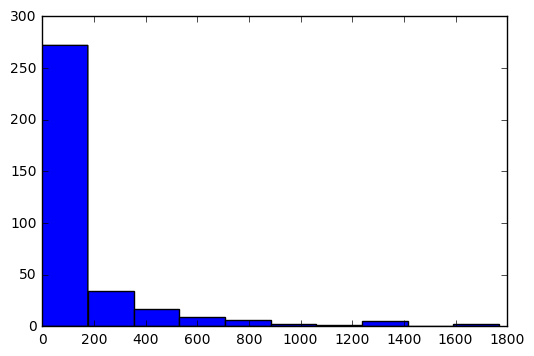

In [38]:
print('Non Passed minutes')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(minutes_visited_by_account_not_passed.values()))

Passed minutes


(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

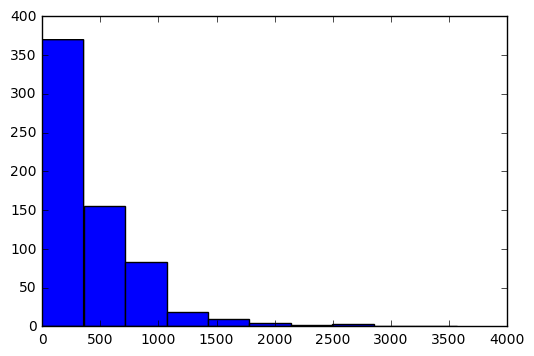

In [39]:
print('Passed minutes')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(minutes_visited_by_account_passed.values()))

Non Passed days


(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

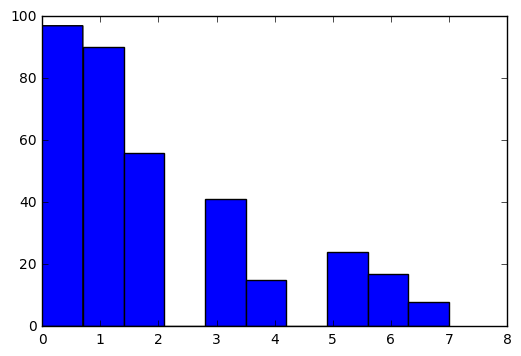

In [40]:
print('Non Passed days')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(days_visited_by_account_not_passed.values()))

Passed days


(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

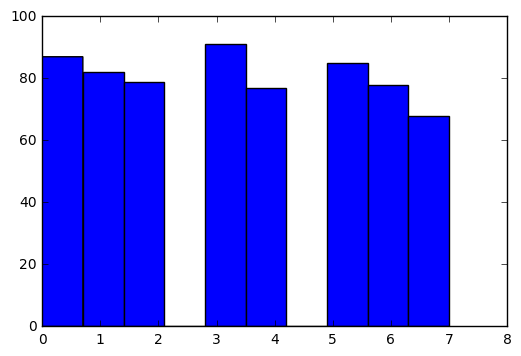

In [41]:
print('Passed days')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(days_visited_by_account_passed.values()))

Non Passed lessons


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

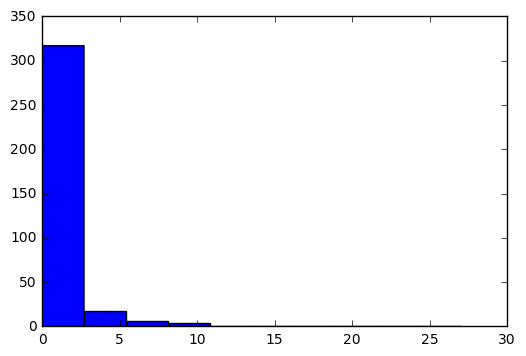

In [42]:
print('Non Passed lessons')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(lessons_completed_by_account_not_passed.values()))

Passed lessons


(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

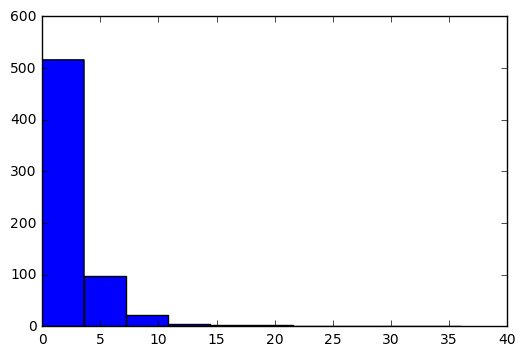

In [43]:
print('Passed lessons')
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(list(lessons_completed_by_account_passed.values()))

  Running setup.py bdist_wheel for Seaborn: started
  Running setup.py bdist_wheel for Seaborn: finished with status 'done'
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\cb\c8\67\83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built Seaborn


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

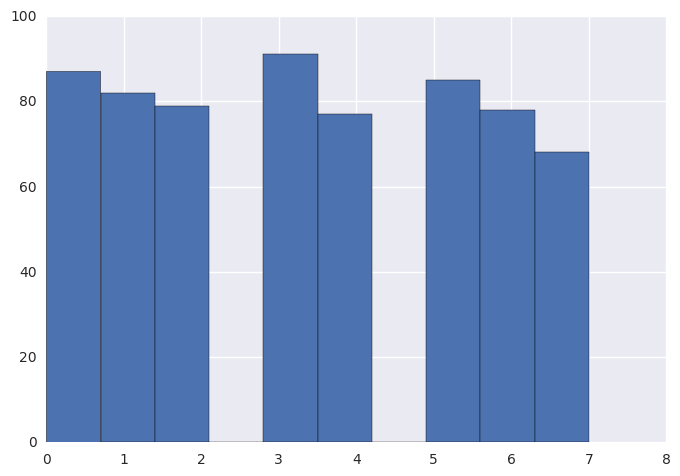

In [49]:
import seaborn as sns
plt.hist(list(days_visited_by_account_passed.values()))

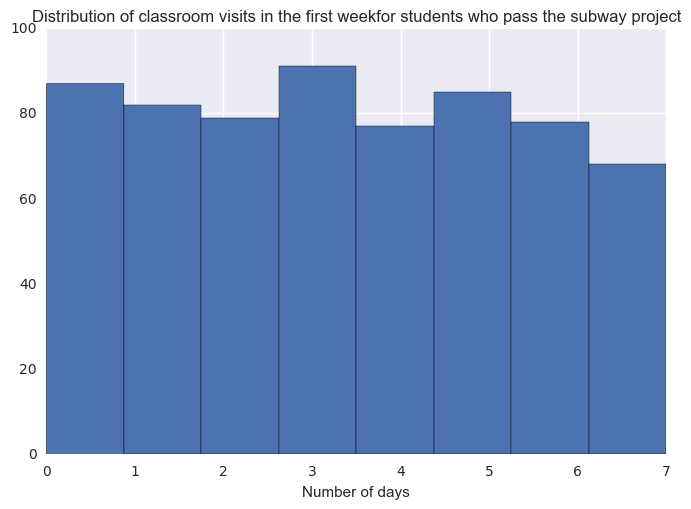

In [50]:
import seaborn as sns
plt.hist(list(days_visited_by_account_passed.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week'+'for students who pass the subway project')

In [2]:
#importing csv through pandas
import pandas as pd

In [3]:
gdp_per_capita=pd.read_csv('gdp_per_capita.csv')

In [4]:
len(gdp_per_capita['Country'].unique())

275

In [5]:
#Quiz
import numpy as np

In [6]:
# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

# Change False to True for each block of code to see what it does

# Accessing elements
if True:
    print (countries[0])
    print (countries[3])

# Slicing
if True:
    print (countries[0:3])
    print (countries[:3])
    print (countries[17:])
    print (countries[:])

# Element types
if True:
    print (countries.dtype)
    print (employment.dtype)
    print (np.array([0, 1, 2, 3]).dtype)
    print (np.array([1.0, 1.5, 2.0, 2.5]).dtype)
    print (np.array([True, False, True]).dtype)
    print (np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype)

# Looping
if True:
    for country in countries:
        print ('Examining country {}'.format(country))

    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        print ('Country {} has employment {}'.format(country,
                country_employment))

# Numpy functions
if True:
    print (employment.mean())
    print (employment.std())
    print (employment.max())
    print (employment.sum())
def max_employment(countries, employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    '''
    max_country = None      # Replace this with your code
    max_value = 0   # Replace this with your code
    for i in range(len(countries)):
        country = countries[i]
        country_employment = employment[i]
        if country_employment>max_value:
            max_value=country_employment
            max_country=country
    return (max_country, max_value)

Afghanistan
Angola
['Afghanistan' 'Albania' 'Algeria']
['Afghanistan' 'Albania' 'Algeria']
['Bhutan' 'Bolivia' 'Bosnia and Herzegovina']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']
<U22
float64
int32
float64
bool
<U2
Examining country Afghanistan
Examining country Albania
Examining country Algeria
Examining country Angola
Examining country Argentina
Examining country Armenia
Examining country Australia
Examining country Austria
Examining country Azerbaijan
Examining country Bahamas
Examining country Bahrain
Examining country Bangladesh
Examining country Barbados
Examining country Belarus
Examining country Belgium
Examining country Belize
Examining country Benin
Examining country Bhutan
Examining country Bolivia
Examining country Bosnia and Herzegovina
Country Afghanistan has employment 55.70000076
Count

In [7]:
#improvised version of previous
def max_employment2(countries, employment):
    i=employment.argmax()
    return (countries[i],employment[i])

In [9]:
# Arithmetic operations between 2 NumPy arrays
if True:
    a = np.array([1, 2, 3, 4])
    b = np.array([1, 2, 1, 2])
    
    print (a + b)
    print (a - b)
    print (a * b)
    print (a / b)
    print (a ** b)
    
# Arithmetic operations between a NumPy array and a single number
if True:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print (a + b)
    print (a - b)
    print (a * b)
    print (a / b)
    print (a ** b)
    
# Logical operations with NumPy arrays
if True:
    a = np.array([True, True, False, False])
    b = np.array([True, False, True, False])
    
    print (a & b)
    print (a | b)
    print (~a)
    
    print (a & True)
    print (a & False)
    
    print (a | True)
    print (a | False)
    
# Comparison operations between 2 NumPy Arrays
if True:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([5, 4, 3, 2, 1])
    
    print (a > b)
    print (a >= b)
    print (a < b)
    print (a <= b)
    print (a == b)
    print (a != b)
    
# Comparison operations between a NumPy array and a single number
if True:
    a = np.array([1, 2, 3, 4])
    b = 2
    
    print ("yo",a > b)
    print (a >= b)
    print (a < b)
    print (a <= b)
    print (a == b)
    print (a != b)
    
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    return (female_completion+male_completion)/2

[2 4 4 6]
[0 0 2 2]
[1 4 3 8]
[ 1.  1.  3.  2.]
[ 1  4  3 16]
[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[ 0.5  1.   1.5  2. ]
[ 1  4  9 16]
[ True False False False]
[ True  True  True False]
[False False  True  True]
[ True  True False False]
[False False False False]
[ True  True  True  True]
[ True  True False False]
[False False False  True  True]
[False False  True  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True False False]
[ True  True False  True  True]
yo [False False  True  True]
[False  True  True  True]
[ True False False False]
[ True  True False False]
[False  True False False]
[ True False  True  True]


In [12]:
overall_completion=overall_completion_rate(female_completion, male_completion)

In [13]:
print (overall_completion)

[  96.416025  102.644275  101.41129    93.316285  103.455575   98.148215
  102.35113    91.77855    92.835475   89.655755   99.218715   98.484275
   94.172835  117.335125   98.275645   33.04039    41.905225   90.962965
   57.08404    93.06015 ]


In [14]:
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

country_name = 'United States'

def standardize_data(values):
    standarized_values=(values-values.mean())/values.std()
    return standarized_values

In [ ]:
# I have to use standardize_data function

In [1]:
if False:
    a = np.array([1, 2, 3, 4])
    b = np.array([True, True, False, False])
    
    print (a[b])
    print (a[np.array([True, False, True, False])])
    
# Creating the index array using vectorized operations
if False:
    a = np.array([1, 2, 3, 2, 1])
    b = (a >= 2)
    
    print (a[b])
    print (a[a >= 2])
    
# Creating the index array using vectorized operations on another array
if False:
    a = np.array([1, 2, 3, 4, 5])
    b = np.array([1, 2, 3, 2, 1])
    
    print (b == 2)
    print (a[b == 2])

def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    Fill in this function to calculate the mean time spent in the classroom
    for students who stayed enrolled at least (greater than or equal to) 7 days.
    Unlike in Lesson 1, you can assume that days_to_cancel will contain only
    integers (there are no students who have not canceled yet).
    
    The arguments are NumPy arrays. time_spent contains the amount of time spent
    in the classroom for each student, and days_to_cancel contains the number
    of days until each student cancel. The data is given in the same order
    in both arrays.
    '''
    mean_time=time_spent[days_to_cancel>=7].mean()
    return mean_time

# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])


NameError: name 'np' is not defined

In [19]:
A=np.array([1,2])
B=A
A+=[1,1]
print(B)
#b and a are pointers and hence updating a will update b also
A=np.array([1,2])
B=A
A=A+[1,1]
print(B)
#b and a are pointers but here a is assigned a new array [2,3] while b still points to prev array

[2 3]
[1 2]


In [ ]:
# Diff b/w numpy array and normal python array is that + in mumpy array adds wheras is python it concats
#also * by scalar multiplies each element by scalar in numpy arrays wheras increases the size of array that many folds in python ones
#ex: normal array:[1,2]*3=[1,2,1,2,1,2]

#inplace: +=; updation takes place then and there whereas in outplace new variables are created ; so we prefer outplace and inplace may produce undesirable results
#slicing a numpy array doesn't creat any new array, its juts point to specified portios, so change in slicing_array[location]
#will also change the value of original_array[location]
#panda series have extra func like describe(); that calc mean, std dev and all in one
#also slicing, accessing, looping, vectorized operations are all similary to numpy arrays

In [12]:
#quiz
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

# Change False to True for each block of code to see what it does

# Accessing elements and slicing
if False:
    print (life_expectancy[0])
    print (gdp[3:6])
    
# Looping
if False:
    for country_life_expectancy in life_expectancy:
        print ('Examining life expectancy {}'.format(country_life_expectancy))
        
# Pandas functions
if False:
    print (life_expectancy.mean())
    print (life_expectancy.std())
    print (gdp.max())
    print (gdp.sum())

# Vectorized operations and index arrays
if False:
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print (a + b)
    print (a * 2)
    print (a >= 3)
    print (a[a >= 3])
   
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    new_array1=variable1<variable1.mean()
    new_array2=variable2<variable2.mean()
    new_arr1=new_array1 & new_array2
    new_array3=variable1>variable1.mean()
    new_array4=variable2>variable2.mean()
    new_arr2=new_array3 & new_array4
    final_arr=new_arr1 | new_arr2
    num_same_direction = final_arr.sum()        # Replace this with your code
    num_different_direction = len(variable1)-final_arr.sum()     # Replace this with your code
    
    return (num_same_direction, num_different_direction)

In [14]:
variable_correlation(life_expectancy,gdp)

(17, 3)

In [17]:
a=np.array([1,2,3,4])
s=pd.Series([1,2,3,4])
s.describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64

In [19]:
#index adv in panda series
life_expectancy=pd.Series([74.7,80,90.2,78.0],index=['Albania','Algeria','America','Afghanistan'])
life_expectancy

Albania        74.7
Algeria        80.0
America        90.2
Afghanistan    78.0
dtype: float64

In [20]:
#numpy arrays are souped up python lists
#a panda series is a cross b/w lists and dictionaries
#nstead of remembering index
print(life_expectancy[1])
#go for
print(life_expectancy.loc['Algeria'])
#for position, use iloc; it is same as life_expectancy[1], however it makes more sense

80.0
80.0


In [21]:
#if we don't mention index in panda series, numbers 0-n are used as index
life_expectancy=pd.Series([74.7,80,90.2,78.0])
life_expectancy

0    74.7
1    80.0
2    90.2
3    78.0
dtype: float64

In [22]:
#quiz
import pandas as pd

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas argmax() function. Documention is
    here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.argmax.html
    '''
    
    max_country = employment.argmax()      # Replace this with your code
    max_value = employment.max()   # Replace this with your code

    return (max_country, max_value)

In [23]:
#panda series add elements according to corresponding "Indexes", if the series have diff indexes they don't produce any results
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print (s1 + s2)

# Indexes have same elements in a different order
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print (s1 + s2)

# Indexes overlap, but do not have exactly the same elements
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print (s1 + s2)

# Indexes do not overlap
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print (s1 + s2)

a    11
b    22
c    33
d    44
dtype: int64
a    31
b    12
c    43
d    24
dtype: int64
a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


In [28]:
#dropna is used for dropping out the "NaN" values
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
sum_res=s1+s2
sum_res.dropna()

c    13.0
d    24.0
dtype: float64

In [30]:
#quiz
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])
(s1+s2).fillna(0)
s1.add(s2,fill_value=0)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64

In [32]:
#apply() function in panda help us to apply our own function to tranform to a new series if the built in fucntions are not available
#ex: s1+2=s1.apply(add2) where add 2 is a function that returns the series by adding 2 to each eleents
#apply funcn should be preferred over loops

#quiz
if True:
    s = pd.Series([1, 2, 3, 4, 5])
    def add_one(x):
        return x + 1
    print (s.apply(add_one))

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])
def reverse_name(name):
    split_name=name.split(" ")
    first_name=split_name[0]
    last_name=split_name[1]
    return last_name + ", " + first_name
#check
reverse_name(names.iloc[0])
def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    return names.apply(reverse_name)

#apply fn automatically takes string by string to the individual fn
reverse_names(names)

0    2
1    3
2    4
3    5
4    6
dtype: int64


0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

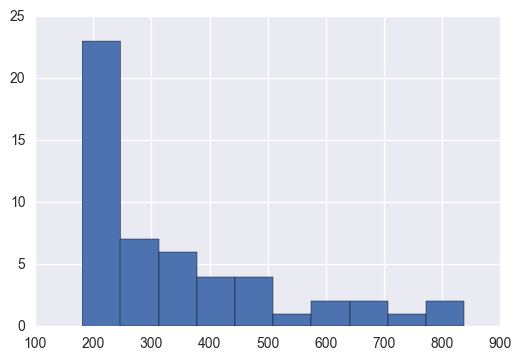

In [37]:
#plots in panda
import seaborn as sns
%matplotlib inline
# or %pylab inline
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')
#print gdp.index.values-> all the country names will be shown
gdp_in = gdp.loc['India']
gdp_in.hist()


NameError: name 'plot' is not defined

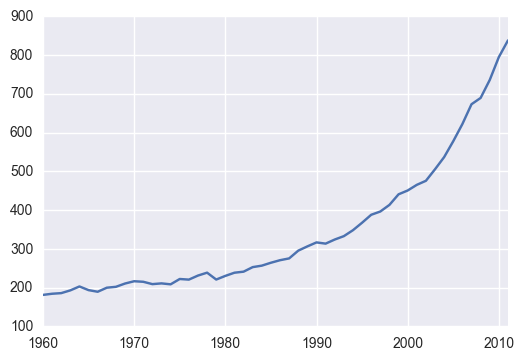

In [38]:
gdp_in.plot()

In [ ]:
#numpy has 2d arrays (python has list of lists) and panda has data frame for 2D data
#in numpy:
#a[1,3] not a[1][3] & mean, std dev etc funcns operate on entire array
#2d arrays are memory efficient

In [9]:
#quiz
import numpy as np
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if False:
    print (ridership[1, 3])
    print (ridership[1:3, 3:5])
    print (ridership[1, :])
    
# Vectorized operations on rows or columns
if False:
    print (ridership[0, :] + ridership[1, :])
    print (ridership[:, 0] + ridership[:, 1])
    
# Vectorized operations on entire arrays
if False:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print (a + b)

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_riders=ridership[0,:].argmax()
    print (max_riders)
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership[:,max_riders].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

In [3]:
mean_riders_for_max_station(ridership)

3


(2342.5999999999999, 3239.9000000000001)

In [10]:
#in numpy axis system says axis=0; for each row and axis=1 for each colmn
#quiz
if True:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print (a.sum())
    print (a.sum(axis=0))
    print (a.sum(axis=1))
    
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_ridership_per_day=ridership.mean(axis=0)
    max_daily_ridership = mean_ridership_per_day. max()    # Replace this with your code
    min_daily_ridership = mean_ridership_per_day. min()     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

45
[12 15 18]
[ 6 15 24]


In [5]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

In [ ]:
#since all the elements need to be of same data type (.dtype() fn) in numpy array, pandas offer data frames which can have diff cols 
#of diff data types
#fns like mean and all are also done col wise
#if ever the whole data is numeric and we want to take(say mean) the apply .values fn and panda series is converted to numpy, then apply mean

In [6]:
import pandas as pd

In [12]:
#quiz
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

# Change False to True for each block of code to see what it does

# DataFrame creation
if False:
    # You can create a DataFrame out of a dictionary mapping column names to values
    df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print (df_1)

    # You can also use a list of lists or a 2D NumPy array
    df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
    print (df_2)
   

# Accessing elements
if False:
    print (ridership_df.iloc[0])
    print (ridership_df.loc['05-05-11'])
    print (ridership_df['R003'])
    print (ridership_df.iloc[1, 3])
    
# Accessing multiple rows
if False:
    print (ridership_df.iloc[1:4])
    
# Accessing multiple columns
if False:
    print (ridership_df[['R003', 'R005']])
    
# Pandas axis
if True:
    df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
    print (df.sum())
    print (df.sum(axis='columns'))
    print (df.values.sum())
    
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_riders=ridership.iloc[0].argmax()
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[max_riders].mean()
    
    return (overall_mean, mean_for_max)

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [11]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

In [13]:
subway_df=pd.read_csv('nyc_subway_weather.csv')

In [14]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [15]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [16]:
#quiz
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    st_x=(x-x.mean())/x.std(ddof=0)
    st_y=(y-y.mean())/y.std(ddof=0)
    return (st_y*st_x).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print (correlation(entries, rain))
print (correlation(entries, temp))
print (correlation(rain, temp))

print (correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


In [17]:
#in pandas we can also use axis names as axis='index' or axis='columns' instead on axis=0 or 1
#vectorised functions are used in pandas 2d dataframes too
#quiz
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print (df1 + df2)
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print (df1 + df2)

# Adding DataFrames with overlapping row indexes
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print (df1 + df2)

# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
#shift function shifts the data set by no of rows mentioned as a parameter 
print (entries_and_exits.shift(1))
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits.diff()

    ENTRIESn     EXITSn
0        NaN        NaN
1  3144312.0  1088151.0
2  3144335.0  1088159.0
3  3144353.0  1088177.0
4  3144424.0  1088231.0
5  3144594.0  1088275.0
6  3144808.0  1088317.0
7  3144895.0  1088328.0
8  3144905.0  1088331.0
9  3144941.0  1088420.0


In [18]:
#another way to define previous function is to use shift function to subtract prev rows (shifted to next) by original series
#since vectorised operations are done index by index, it will give required resuls but the first row will be NaN since
#it does not have anything to subtract to (next row will be NaN then data)
def get_hourly_entries_and_exits(entries_and_exits):
  
    return entries_and_exits-entries_and_exits.shift(1)

In [19]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [21]:
if False:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print (df.applymap(add_one))
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
def convert_grade(grade):
    if grade>=90:
        return 'A'
    elif grade>=80:
        return 'B'
    elif grade>=70:
        return 'C'
    elif grade>=60:
        return 'D'
    else:
        return 'F'
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(convert_grade)

In [22]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [1]:
#in pandas apply() function will perform operations series by series of the data frame where each series represent a column;
#ex: if data in a cell depends upon the colmn ex: say each column is a set of marks for one class, A is given to top 20%
#then col [89,98,90,70] won't have 70->A but col [59,68,60,70] will have 70-> A
#it do have an axis argument in which same can be don with rows
#in numpy default ddof=0, in pandas default ddof=1

In [7]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standarized_column(column):
    return (column-column.mean())/column.std(ddof=0)
def standarize(df):
    return df.apply(standarized_column)
standarize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [24]:
#quiz
#using apply to return single value for each column passed
#data frame will be converetd to panda series
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print (df.apply(np.mean))
    
    print (df.apply(np.max))
    
def column(col):
    new=col-col.max()
    new1=new[new<0]
    ind=(new==new1.max()).argmax()
    return col[ind]
def second_largest(df):
    return df.apply(column)
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [26]:
#another way to do previous
def column1(col):
    sorted_col=col.sort_values(ascending=False) #inplace = false by default (chnges to bool series and we don't want to modify our series)
    return sorted_col.iloc[1]
def second_largest1(df):
    return df.apply(column1)
second_largest1(df)

a     4
b    40
c    20
dtype: int64

In [27]:
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [28]:
#series and dataframe add column wise according to index of series and column name of dataframe
#you can made it work like series' index will be added along with the index of data frame and not column
#using axis in add function
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
df.add(s) #default axis=columns


,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [29]:
df.add(s, axis='index')

,0
0,11
1,22
2,33
3,44


In [30]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df.mean()

exam1    77.7
exam2    57.4
dtype: float64

In [31]:
grades_df.std()

exam1    15.797679
exam2    15.276707
dtype: float64

In [48]:
def standarize2(df):
    return (df-df.mean())/df.std(ddof=0)
standarize2(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [39]:
grades_df.std(axis=1,ddof=0)

Andre       9.5
Barry       9.0
Chris      11.0
Dan         9.5
Emilio     11.0
Fred        9.5
Greta       6.0
Humbert     9.5
Ivan       13.0
James      13.5
dtype: float64

In [49]:
def standarize1(df):
    return (df.sub(df.mean(axis=1), axis=0))/df.std(axis=1,ddof=0)
standarize1(grades_df)

,Andre,Barry,Chris,Dan,Emilio,Fred,Greta,Humbert,Ivan,James,exam1,exam2
Andre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emilio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ivan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
mean_diff=grades_df.sub(grades_df.mean(axis=1),axis=0)
mean_diff.div(grades_df.std(ddof=0, axis=1), axis=0)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [61]:
def standarize_row_wise(df):
    mean_diff=df.sub(df.mean(axis=1),axis=0)
    return mean_diff.div(df.std(axis=1,ddof=0),axis=0)
standarize_row_wise(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [ ]:
#group by is used to collect rows with same key as specified
#it groups them as column name that key and rows are the indexes where that key was column in original data frame
#.sum()[over some column] is used to sum up all the rows for the specifed column under that key
#however sum fn will work only with numericals and not with other things like date

In [69]:


values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print (example_df)
    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print (grouped_data.groups)
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print (grouped_data.groups)
    
# Get sum of each group
if False:
    grouped_data = example_df.groupby('even')
    print (grouped_data.sum())
    
# Limit columns in result
if True:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print (grouped_data.sum()['value'])
    
    print ('\n' )# Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print (grouped_data['value'].sum())
    
filename = 'nyc_subway_weather.csv'

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [70]:
subway_df = pd.read_csv(filename)
subway_df.columns.values.tolist()

['UNIT',
 'DATEn',
 'TIMEn',
 'ENTRIESn',
 'EXITSn',
 'ENTRIESn_hourly',
 'EXITSn_hourly',
 'datetime',
 'hour',
 'day_week',
 'weekday',
 'station',
 'latitude',
 'longitude',
 'conds',
 'fog',
 'precipi',
 'pressurei',
 'rain',
 'tempi',
 'wspdi',
 'meanprecipi',
 'meanpressurei',
 'meantempi',
 'meanwspdi',
 'weather_lat',
 'weather_lon']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


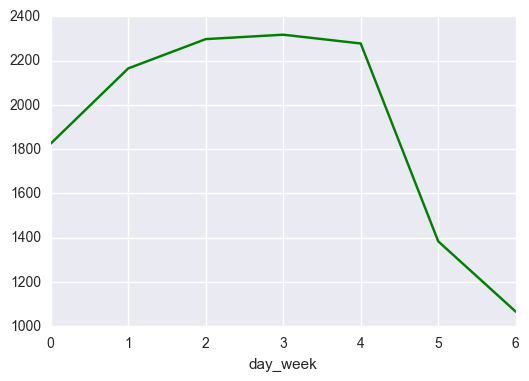

In [78]:
%pylab inline
grp_data=subway_df.groupby('day_week')
mean_ridership=grp_data['ENTRIESn_hourly'].mean()
mean_ridership.plot(color='green')

In [80]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if False:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(standardize))
    
# Find second largest value in each group
if False:
    def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(second_largest))

# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def hourly_for_group(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Use the `get_hourly_entries_and_exits()` function you wrote
    in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`
    function, to help solve this problem.
    '''
  
    return entries_and_exits-entries_and_exits.shift(1)
ridership_df.groupby('UNIT')['ENTRIESn','EXITSn'].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [88]:
#merge function allow us to "JOIN IN SQL" diff dataframes
#sub<left df>.merge(enrol<right df>, on="KEY", how="left/inner/outer/")
#quiz
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on=['DATEn','hour','latitude', 'longitude'], how='inner')

In [89]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [ ]:
#in the above table the column names of two dataframes were same and hence easily mayched up, but if that wasn't the case, then
# say in weather_df its 'date' and subway_df is'DATEn',then
# subway_df.merge(weather_df, left_on=['DATEn','hour','latitude', 'longitude'], right_on=['date','hour','latitude', 'longitude'], how='inner)

In [ ]:
#Histograms of subway ridership on both days with rain and days without rain
#A scatterplot with subway ridership on one axis and precipitation or temperature on the other

In [97]:
#A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
#If you choose this option, you may wish to use the as_index=False argument to groupby(). There is example code in the following quiz.
subway_df=pd.read_csv('nyc_subway_weather.csv')
data_by_location=subway_df.groupby(['latitude','longitude']).mean()
data_by_location.head()

,,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
latitude,longitude,,,,,,,,,,,,,,,,,,,
40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,0.006284,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,0.006216,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,0.006183,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,0.006118,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,0.002744,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [98]:
#in the above table, latitude and longitude are shifted as rows, to avoid this add as_index=False
data_by_location=subway_df.groupby(['latitude','longitude'], as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [99]:
#and hence we can now access latitude and longitude
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

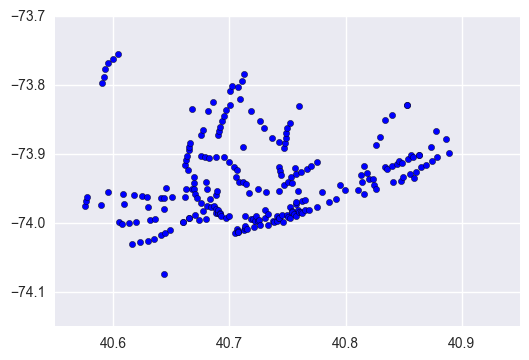

In [102]:

plt.scatter(data_by_location['latitude'], data_by_location['longitude'])

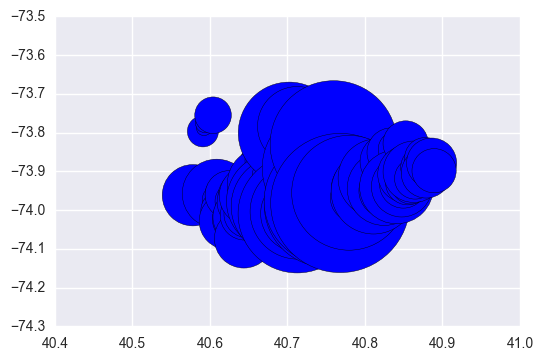

In [103]:
#variation of dot size with a given formula applied on array could be done; here only array is there
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],s=data_by_location['ENTRIESn_hourly'])

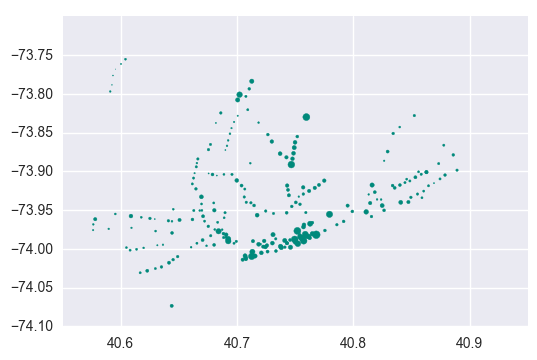

In [111]:
#since bubble sizes are really big, we will use scaled entries as follows
scaled_entries=(data_by_location['ENTRIESn_hourly']*5)/data_by_location['ENTRIESn_hourly'].std(ddof=0)# (*5) was used to make bubbles clear
plt.scatter(data_by_location['latitude'], data_by_location['longitude'],s=scaled_entries, color='#00897B')

In [112]:
#NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, 
#you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:
np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])

array([[['A1a', 'A1b', 'A1c'],
        ['A2a', 'A2b', 'A2c']],

       [['B1a', 'B1b', 'B1c'],
        ['B2a', 'B2b', 'B2c']]], 
      dtype='<U3')

In [ ]:
#Pandas has a data structure called a Panel, which is similar to a DataFrame or a Series, but for 3D data.